# **Create a Simple workflow in which we will generate a blog content on the based of topic**
**Start  ------>  llm (generate outline based on topic)  ------->  2nd llm (generate blog based on topic and outline)  ------->  END**

In [7]:
!pip install langchain_openai

In [8]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI

In [3]:
class LLMSTATE(TypedDict):

  topic : str
  outline : str
  blog : str

In [ ]:
OPENAI_API_KEY = ""

In [10]:
llm = ChatOpenAI(model="gpt-4o-mini", api_key=OPENAI_API_KEY)

In [13]:
def generate_outline(state: LLMSTATE) -> LLMSTATE:

  topic = state["topic"]

  prompt = f"generate a outline based on this topic {topic}"
  response = llm.invoke(prompt)
  outline = response.content

  state["outline"] = outline

  return state

In [14]:
def generate_blog(state: LLMSTATE) -> LLMSTATE:

  topic = state["topic"]
  outline = state["outline"]

  prompt = f"generate a blog on this topic {topic} \n and outline {outline}"

  response = llm.invoke(prompt)
  blog_content = response.content

  state["blog"] = blog_content

  return state

In [16]:
graph = StateGraph(LLMSTATE)

#create a node
graph.add_node('generate_outline', generate_outline)
graph.add_node('generate_blog', generate_blog)

#create edges of graph

graph.add_edge(START,'generate_outline')
graph.add_edge('generate_outline', 'generate_blog')
graph.add_edge('generate_blog', END)


#workflow
workflow = graph.compile()

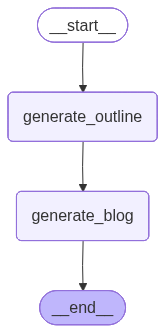

In [25]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [22]:
result = workflow.invoke({"topic": "the mysterious egypt"})

In [24]:
from IPython.display import Markdown, display


display(Markdown(f"## 🧠 Topic\n**{result['topic'].title()}**"))
display(Markdown("## 📌 Outline"))
display(Markdown(result["outline"]))
display(Markdown("## 📝 Blog"))
display(Markdown(result["blog"]))


## 🧠 Topic
**The Mysterious Egypt**

## 📌 Outline

**Outline: The Mysterious Egypt**

I. **Introduction**
   A. Brief overview of Egypt's significance in history and culture
   B. The allure of ancient Egypt and its mysteries
   C. Purpose of the outline: to explore the enigmatic aspects of Egypt

II. **The Ancient Civilization of Egypt**
   A. Overview of the historical timeline
      1. Pre-dynastic period
      2. The Old Kingdom
      3. The Middle Kingdom
      4. The New Kingdom
      5. Greco-Roman period
   B. Achievements in art, architecture, and science
      1. Construction of pyramids and temples
      2. Advances in medicine and mathematics
      3. Development of hieroglyphics

III. **The Pyramids and Sphinx**
   A. The Great Pyramid of Giza
      1. Construction theories and architectural brilliance
      2. Mystical beliefs and functions
   B. The Sphinx's symbolism and theories of origin
   C. Theories surrounding hidden chambers and treasures

IV. **Religion and Mythology**
   A. Overview of ancient Egyptian religion
      1. Major gods and goddesses
      2. The significance of afterlife beliefs
   B. Mysterious rituals and customs
   C. Mythological stories that shaped Egyptian culture

V. **The Role of the Nile River**
   A. The Nile's importance to Egyptian civilization
      1. Agriculture and sustenance
      2. Trade and transportation
   B. The Nile's symbolism and its role in mythology
   C. Contemporary mysteries surrounding the river

VI. **Archaeological Discoveries and Challenges**
   A. Major archaeological sites and findings
      1. The Valley of the Kings
      2. Tutankhamun's tomb
   B. Ongoing discoveries and advancements in technology
   C. Challenges faced by archaeologists (e.g., looting, climate change)

VII. **Modern Egypt and Cultural Mystique**
   A. The influence of ancient Egypt on contemporary culture
      1. Literature, film, and art
   B. Myths and misconceptions about Egypt in modern media
   C. The ongoing fascination and tourism driven by Egypt's mysteries

VIII. **Conclusion**
   A. Recap of the enigmatic aspects of Egypt explored
   B. The enduring legacy of ancient Egyptian civilization
   C. Invitation for further exploration and inquiry into Egypt's mysteries

IX. **Further Reading and Resources**
   A. Suggested books and articles for deeper understanding
   B. Websites and documentaries for exploration
   C. Notable museums and archaeological sites to visit

## 📝 Blog

# The Mysterious Egypt: Unveiling the Secrets of an Ancient Civilization

## I. Introduction
Egypt, often referred to as the cradle of civilization, stands as a testament to human ingenuity and creativity throughout history. From its majestic monuments to the intricate tapestry of its culture, ancient Egypt has captivated the imagination of people worldwide. The allure of its mysteries—enigmatic structures, complex belief systems, and untold stories—continues to spark curiosity and debate among historians, archaeologists, and enthusiasts alike. In this blog, we will explore the countless enigmatic aspects of Egypt, shedding light on the elements that contribute to its enduring mystique.

## II. The Ancient Civilization of Egypt
### A. Overview of the Historical Timeline
1. **Pre-dynastic Period**: The foundations of Egyptian society laid down before the unification of Upper and Lower Egypt.
2. **The Old Kingdom**: A time characterized by the construction of the iconic pyramids and the establishment of a centralized state.
3. **The Middle Kingdom**: Known for its literary achievements and economic prosperity.
4. **The New Kingdom**: A period of imperial expansion and monumental achievements, marked by famous pharaohs like Ramses II and Hatshepsut.
5. **Greco-Roman Period**: The blending of Egyptian culture with Greek and Roman influences, leading to new advancements.

### B. Achievements in Art, Architecture, and Science
1. **Construction of Pyramids and Temples**: The architectural marvels that have stood the test of time, such as the Great Pyramid of Giza.
2. **Advances in Medicine and Mathematics**: Groundbreaking medical practices and mathematical concepts that laid the groundwork for future generations.
3. **Development of Hieroglyphics**: The intricate writing system that communicated complex ideas and recorded history.

## III. The Pyramids and Sphinx
### A. The Great Pyramid of Giza
1. **Construction Theories and Architectural Brilliance**: The engineering feats behind the pyramid's construction, including the methods and labor used.
2. **Mystical Beliefs and Functions**: The pyramid's role as a tomb and its connection to the afterlife.

### B. The Sphinx's Symbolism and Theories of Origin
The enigmatic creature, guarding the pyramids, prompts questions about its purpose and the secrets it may hold.

### C. Theories Surrounding Hidden Chambers and Treasures
Ongoing speculation about undiscovered chambers within the Great Pyramid continues to fuel the imagination of explorers and archaeologists alike.

## IV. Religion and Mythology
### A. Overview of Ancient Egyptian Religion
1. **Major Gods and Goddesses**: The pantheon of deities that personified natural forces and were integral to Egyptian society.
2. **The Significance of Afterlife Beliefs**: How beliefs in the afterlife influenced burial practices and daily life.

### B. Mysterious Rituals and Customs
From mummification to elaborate funerals, these practices encapsulate the spiritual beliefs that defined ancient Egyptian culture.

### C. Mythological Stories that Shaped Egyptian Culture
Fascinating tales of gods, creation, and the afterlife that reflect the values and beliefs of Egyptians.

## V. The Role of the Nile River
### A. The Nile's Importance to Egyptian Civilization
1. **Agriculture and Sustenance**: How the river's annual floods fertilized the land and supported crops.
2. **Trade and Transportation**: The river as a vital trade route that connected various regions.

### B. The Nile's Symbolism and Its Role in Mythology
The Nile as the giver of life, intertwined with myths and legends that illustrate its significance.

### C. Contemporary Mysteries Surrounding the River
Modern challenges, such as climate change and pollution, pose questions about the Nile's future.

## VI. Archaeological Discoveries and Challenges
### A. Major Archaeological Sites and Findings
1. **The Valley of the Kings**: The burial ground of pharaohs, revealing treasures and secrets of the royal tombs.
2. **Tutankhamun's Tomb**: The discovery of this tomb and its artifacts has provided vast insights into ancient Egyptian life.

### B. Ongoing Discoveries and Advancements in Technology
Innovative archaeological methods have led to new findings and the reevaluation of past theories.

### C. Challenges Faced by Archaeologists
Issues such as looting, political instability, and climate change complicate the pursuit of knowledge about Egypt's past.

## VII. Modern Egypt and Cultural Mystique
### A. The Influence of Ancient Egypt on Contemporary Culture
1. **Literature, Film, and Art**: How ancient Egyptian themes continue to inspire modern storytelling and creativity.

### B. Myths and Misconceptions About Egypt in Modern Media
Debunking common myths and illuminating the reality of life in contemporary Egypt.

### C. The Ongoing Fascination and Tourism Driven by Egypt's Mysteries
Tourism as a means of connecting with the rich history of Egypt and exploring its wonders.

## VIII. Conclusion
In exploring the myriad mysteries of Egypt, we uncover a civilization that, despite centuries of history, continues to intrigue and inspire. Its legacies—monuments, beliefs, and cultural innovations—endure as testaments to human creativity. Egypt remains a land of exploration, where each pyramid, artifact, and river holds a story waiting to be told.

## IX. Further Reading and Resources
For those eager to dive deeper into the mysteries of Egypt, here are some suggested resources:
### A. Suggested Books and Articles for Deeper Understanding
- "The Oxford History of Ancient Egypt" by Ian Shaw
- "The Complete Gods and Goddesses of Ancient Egypt" by Richard H. Wilkinson
   
### B. Websites and Documentaries for Exploration
- The British Museum's website for Egyptian artifacts
- Documentaries such as "Secrets of the Saqqara" on Netflix

### C. Notable Museums and Archaeological Sites to Visit
- The Egyptian Museum in Cairo
- The Pyramids of Giza and the Sphinx

By engaging with these resources, readers can embark on their journey to unlock the secrets of the mysterious and enchanting land of ancient Egypt.